In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [154]:
df = pd.read_csv('/content/car_price_prediction.csv')

In [155]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [156]:
df.shape

(19237, 18)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [158]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [159]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

We need to remove the Turbo to convert this column to float values. 

In [160]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo','').astype(float)

In [161]:
df['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973])

In [162]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [163]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [164]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

We need to remove 'km' from Mileage data to convert it as an integer. 

In [165]:
df['Mileage'] = df['Mileage'].str.replace(' km','').astype(int)

In [166]:
df['Doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
19236    04-May
Name: Doors, Length: 19237, dtype: object

In [167]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [168]:
df = df.drop(columns=['ID','Doors','Model','Levy','Manufacturer','Color'])

In [169]:
df

,Price,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,13328,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,12
1,16621,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,8
2,8467,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,2
3,3607,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,0
4,11726,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,5
19233,15681,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,8
19234,26108,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,4
19235,5331,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,4


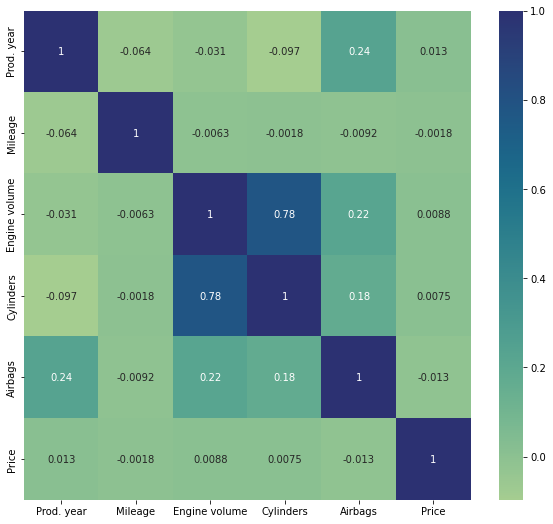

In [170]:
%matplotlib inline
fig,ax=plt.subplots(figsize=(10,9))
sns.heatmap(df[['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']].corr(),annot=True,cmap='crest')

In [171]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data
cont_d=['Price','Mileage','Engine volume']
df = handling_outliers(df, cont_d)

<ipython-input-171-546595503a9c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
<ipython-input-171-546595503a9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound


In [113]:
df.describe()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,...,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,2.307990,1.532236e+06,4.582991,6.582627,0.725373,0.077143,0.669231,0.119821,...,0.027655,0.012112,0.147996,0.284504,0.000572,0.015907,0.033633,0.002703,0.454125,0.018922
std,1.905813e+05,5.668673,0.877805,4.840387e+07,1.199933,4.320168,0.446338,0.266825,0.470502,0.324761,...,0.163987,0.109389,0.355105,0.451190,0.023906,0.125118,0.180288,0.051923,0.497904,0.136253
min,1.000000e+00,1939.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.331000e+03,2009.000000,1.800000,7.013900e+04,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.317200e+04,2012.000000,2.000000,1.260000e+05,4.000000,6.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.207500e+04,2015.000000,2.500000,1.888880e+05,4.000000,12.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.630750e+07,2020.000000,20.000000,2.147484e+09,16.000000,16.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
df[df['Price']>1e+07]

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
16983,26307500,1999,1.7,99999,4.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


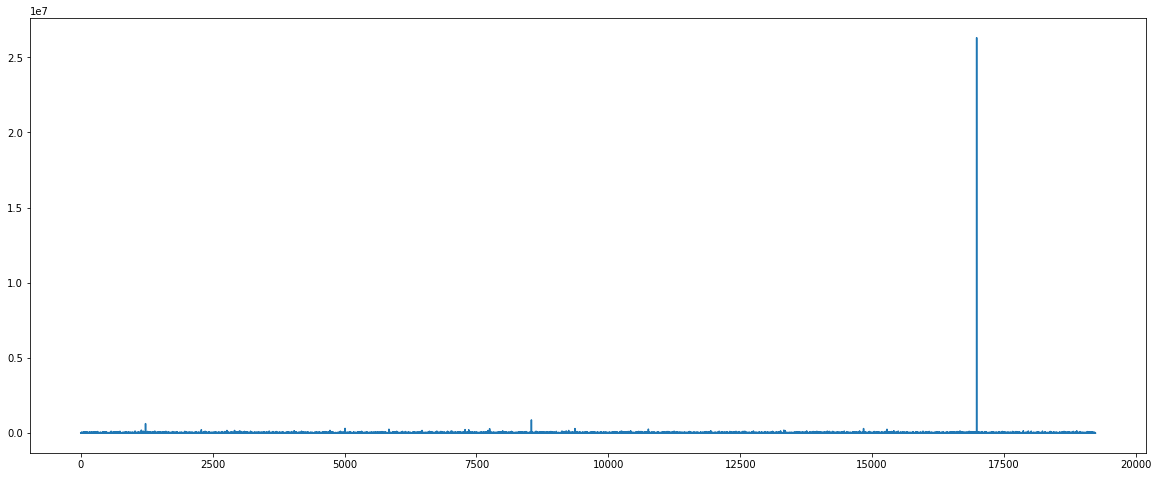

In [116]:
plt.plot(df['Price'])

In [ ]:
df = df[df['Price']<1e+07]

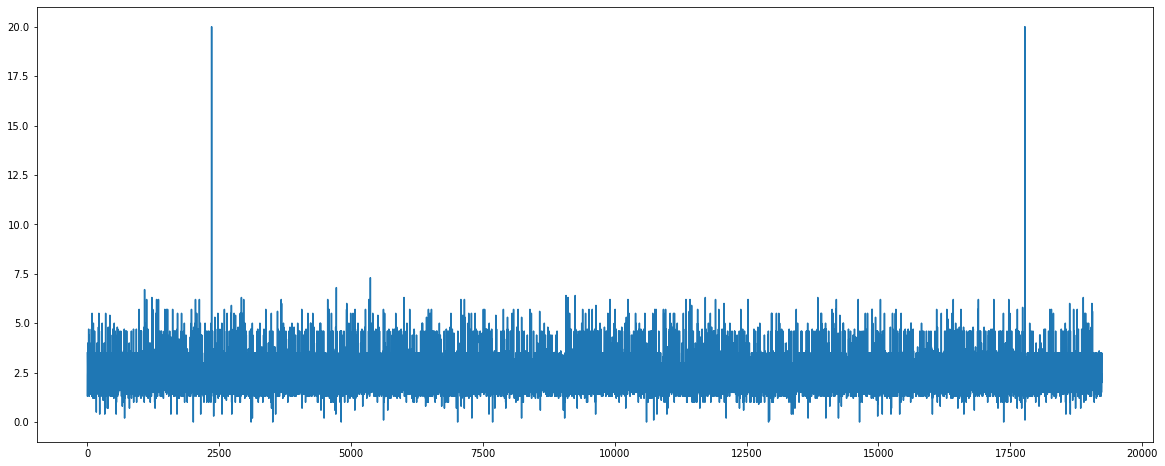

In [131]:
plt.plot(df['Engine volume'])

In [136]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [137]:
df = df[df['Engine volume']<20]

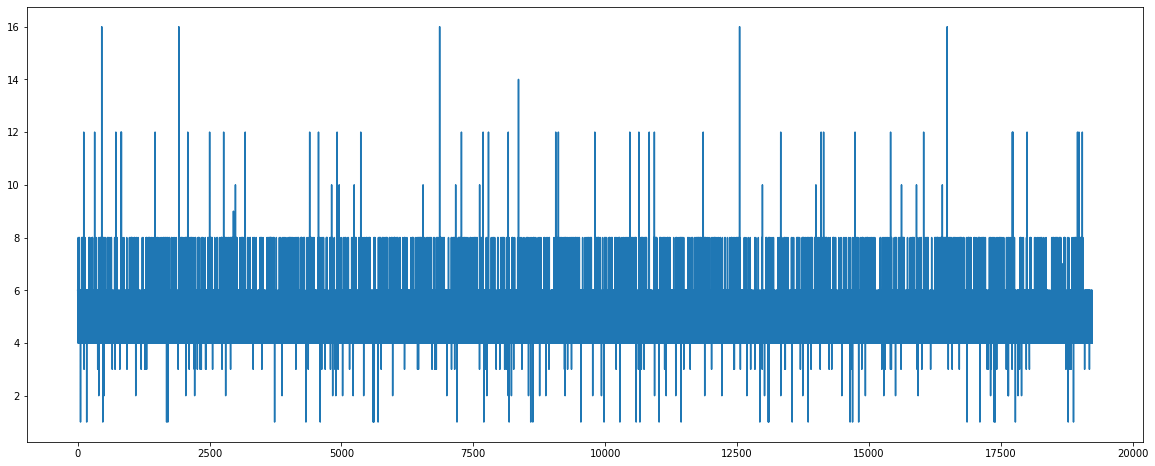

In [153]:
# ['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']
plt.plot(df['Cylinders'])

In [172]:
def dummies(col,df):
    temp = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([col], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('Leather interior',df)
df = dummies('Wheel',df)
df = dummies('Drive wheels',df)
df = dummies('Gear box type',df)
df = dummies('Fuel type',df)
df = dummies('Category',df)

In [173]:
df

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
0,13328,2010,3.5,186005,6.0,12,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,16621,2011,3.0,192000,6.0,8,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8467,2006,1.3,200000,4.0,2,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3607,2011,2.5,168966,4.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11726,2014,1.3,91901,4.0,4,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,2.0,300000,4.0,5,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
19233,15681,2011,2.4,161600,4.0,8,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19234,26108,2010,2.0,116365,4.0,4,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
19235,5331,2007,2.0,51258,4.0,4,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [174]:
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [175]:
scaler = MinMaxScaler()
df_train[['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']] = scaler.fit_transform(df_train[['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']])

In [176]:
df_train

,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Yes,Right-hand drive,Front,Rear,...,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
15792,0.014940,0.925926,0.625000,0.314192,0.200000,0.750,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19137,0.320492,0.901235,0.446429,0.427328,0.200000,0.250,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7197,0.001038,0.851852,0.267857,0.396661,0.200000,0.500,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
911,0.014940,0.925926,0.625000,0.314192,0.200000,0.750,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7895,0.797457,0.987654,0.303571,0.014986,0.200000,0.375,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.684488,0.925926,1.000000,0.276351,0.466667,0.750,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
79,0.004641,0.864198,0.625000,0.527543,0.200000,0.000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12119,0.018245,0.925926,0.232143,0.362918,0.200000,0.000,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
14147,1.000000,0.950617,0.446429,0.372368,0.200000,0.250,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

In [178]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [179]:
df_test[['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']] = scaler.fit_transform(df_test[['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price']])

In [180]:
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']

In [181]:
y_pred = lm.predict(X_test)

In [182]:
y_pred.shape

(4810,)

In [183]:
np.array(y_test).shape

(4810,)

In [184]:
r2_score(y_test, y_pred)

0.34647029252343153

In [185]:
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)


regressors = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

K Nearest Neighbours : 63 %
Decision Tree : 47 %
Random Forest : 75 %
AdaBoost : 37 %
Gradient Boosting Regressor : 74 %
[09:00:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 73 %


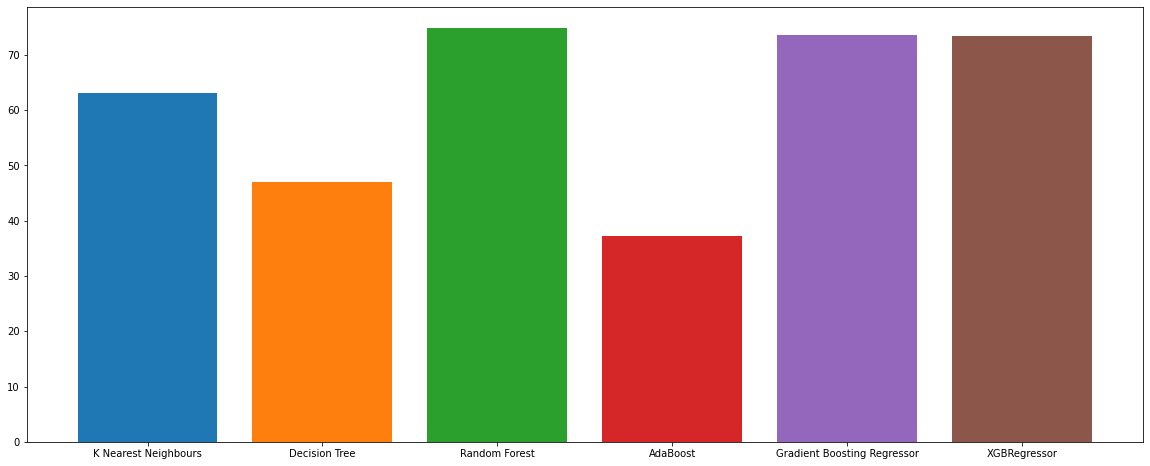

In [186]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)